In [1]:
# import statements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

# Question 3

**Coding Question:** Consider the function $f : \mathbb{R}^2 \rightarrow \mathbb{R}$ with


$f(x_1, x_2) = (x_1 - 2)^2 + (x_2 - 2)^2 - x_1 x_2$


and the following constrained optimization problem:


$\min_{x_1, x_2} f(x_1, x_2) \quad \text{subject to} \quad 0 \leq x_i \leq 1, \quad i = 1, 2$

Write a projected gradient descent algorithm with a constant step size $ \mu = 0.001 $, starting at $ (0.5, 0.5) $ for 175 iterations, for the above optimization problem. Plot the function value $ f(x^{(t)})$ against the iteration \( t \).


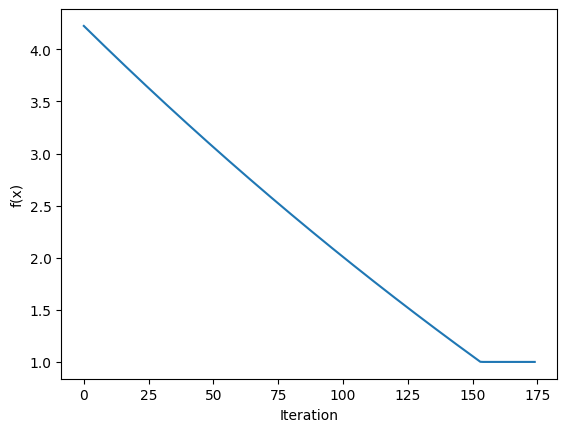

In [5]:
# We can start with the function itself f(x1, x2)

mu = 0.001
N = 175 # This is the number of iterations
startPoint = np.array([0.5, 0.5])

#The normal funciton itself
def function(x1, x2):
    return (x1 - 2)**2 + (x2 - 2)**2 - x1 * x2

def gradientFunction(x_1, x_2):
  return np.array([(2 * x_1) - x_2 - 4, -x_1 + 2 * x_2 - 4])

#We want our starting point to be (0.5, 0.5) for 175 iterations with mu = 0.0001
#I will be referrring to the gradient descent equation: x^(t+1) = x^(t) - μ * gradient(f(x^(t)))


def gradientDescent(array):

  fVals = []

  for i in range(N):
    # gradient(f(x^(t)))
    gFunction = gradientFunction(array[0], array[1])
    #x^(t) - μ * gradient(f(x^(t)))
    array = array - mu * gFunction
    #Projecting the array here so it can be in [0, 1]
    array = np.clip(array, 0, 1)
    fVals.append(function(array[0], array[1]))

  return array, fVals


fPoints, fVals = gradientDescent(startPoint)


plt.plot(range(len(fVals)), fVals)
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.show()



# Question 4



In [6]:
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (70000, 784) y shape: (70000,)


In [7]:
# this cell processes some of the data

# if this returns an error of the form "KeyError: 0", then try running the following first:
# X = X.values # this converts X from a pandas dataframe to a numpy array
if isinstance(X, pd.DataFrame):
    X = X.values


digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X[j].reshape(28,28))
digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


In [8]:
# this cell would stack 100 examples from each class together
# this cell also ensures that each pixel is a flot between 0 and 1 instead of an int between 0 and 255
data = []
for i in range(10):
    flattened_images = digits[i][:100].reshape(100,-1)
    data.append(flattened_images)

data = np.vstack(data)
data = data.astype('float32') / 255.0

In [9]:
# create dataset here (essentially just create a numpy array of 1's and -1's for the labels)
four500 = digits[4][:500] #Getting the first 500 exampls of 0's
nine500 = digits[9][:500] #Getting the first 500 examples of 1's

#Using the tip of creating num[y array of 1's and -1's
zeroLabels = np.full(500, -1)
oneLabels = np.full(500, 1)


newFour = []
for image in four500:
  flattened_images = image.flatten()
  newFour.append(flattened_images)


newFour = np.vstack(newFour)
newFour = newFour.astype('float32') / 255.0


newNine = []
#Doing the same for the ones
for image in nine500:
  flattened_images = image.flatten()
  newNine.append(flattened_images)

newNine = np.vstack(newNine)
newNine = newNine.astype('float32') / 255.0


#Alright time to combine
trainingData = np.vstack((newFour, newNine))
trainingLabel = np.concatenate((zeroLabels, oneLabels))


In [10]:
def F(w):
    N = len(trainingData)
    total_loss = 0

    for i in range(N):
        x = trainingData[i]
        y = trainingLabel[i]

        exponent_term = -np.dot(w, x) * y
        loss = np.log(1 + np.exp(exponent_term))

        total_loss += loss

    return total_loss / N


def gradientDescent(w):
    N = len(trainingData)
    gradient = np.zeros(w.shape)

    for i in range(N):
        x = trainingData[i]
        y = trainingLabel[i]

        exponentTerm = np.dot(w, x) * y

        mult = -y / (1 + np.exp(exponentTerm))
        gradientStep = mult * x

        gradient += gradientStep

    return gradient / N


**part 4a**

Implement and run $L^{\infty}$ gradient descent with step size $ \mu = 10^{-8} $. Run your algorithm for at least 1000 iterations and initialize with $ w^{(0)} = 0 $ (i.e., the zero vector).

Recall: $L^{\infty}$ gradient descent uses steps
$$
p^{(t)} = \text{sign}(\nabla F(w^{(t)})) \| \nabla F(w^{(t)}) \|_1.
$$


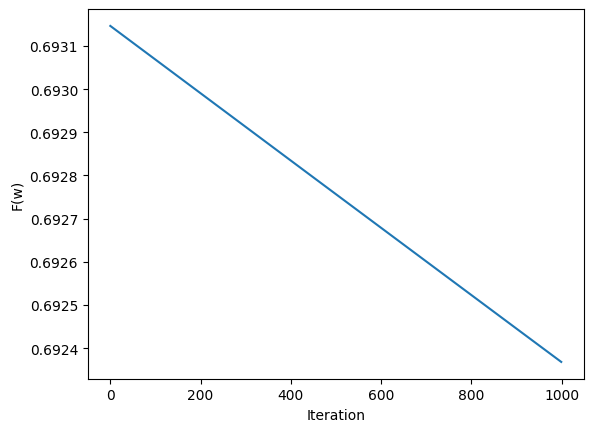

In [15]:
mu = 1e-8
iterations = 1000

wVals = []
w = np.zeros(trainingData.shape[1])

def LgradientDescent(w):

  for i in range(iterations):
    gradientVal = gradientDescent(w)

    #lets calculate p^t
    p = np.sign(gradientVal) * np.linalg.norm(gradientVal, 1)

    #Now lets calculate the new gradient descent w^t - mu * p^t
    w = w - mu * p

    wVals.append(F(w))

  return w

final_w = LgradientDescent(w)

plt.plot(range(len(wVals)), wVals)
plt.xlabel('Iteration')
plt.ylabel('F(w)')
plt.show()

**Part 4b.**

Implement and run $L^1$ gradient descent (aka. coordinate descent) with step size $\mu = 10^{-4}$. Run your algorithm for at least 1000 iterations and initialize with $w^{(0)} = 0$ (i.e., the zero vector).

Recall: $L^1$ gradient descent uses steps
$$
p^{(t)} = \text{sign}(\nabla_{j^*} F(w^{(t)})) \| \nabla F(w^{(t)}) \|_{\infty} e_{j^*},
$$
where $j^*$ is the location of the largest entry of the gradient, and $e_j$ is the zero vector with a $1$ in the $j^{th}$ entry.


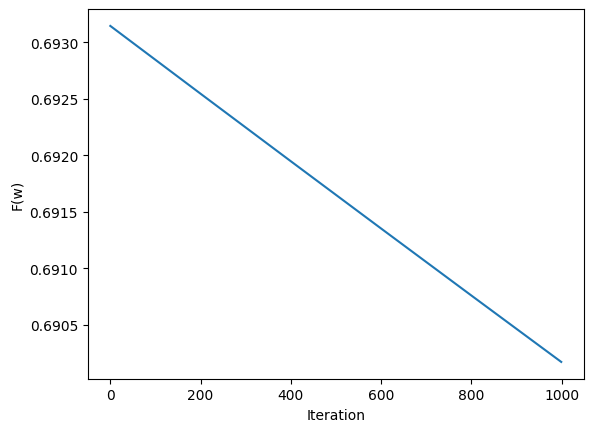

In [12]:
mu = 1e-4
iterations = 1000

wVals = []
w = np.zeros(trainingData.shape[1])



def LgradientDescent(w):

  for i in range(iterations):
    gradientVal = gradientDescent(w)

    #j is the location of the largest entry of the gradient
    j = np.argmax(np.abs(gradientVal))

    #lets calculate p^t
    p = np.zeros_like(w)  # Start with a zero vector
    p[j] = np.sign(gradientVal[j]) * np.linalg.norm(gradientVal, np.inf)

    #Now lets calculate the new gradient descent w^t - mu * p^t
    w = w - mu * p

    wVals.append(F(w))

  return w

final_w = LgradientDescent(w)

plt.plot(range(len(wVals)), wVals)
plt.xlabel('Iteration')
plt.ylabel('F(w)')
plt.show()



**Part 4c.**

Compare these two descent plots of $F (w)$, along with the analogous plot
for gradient descent from HW3.5. Which performs best, and do you have an
argument for why? Do you think the performance would change with different
step sizes?


*Answer:*

Looking at all of the graphs, I would say that the gradient descent from HW3.5 has the best performance. This is because it rapidly reduces and converges. Now if we look at $ L^{\infty} $ and $L^1$ the gradient descent is slower. Now if we look at $ L^{\infty} $ we can see that its slow due to the fact that it updates coordinates depending on the largest gradient component, which can put some constraints on each iteration. For $L^1$'s gradient being slow its because it updates one coordinate at a time. The step size for HW3.5 is pretty small but if we change it or leave it as is it still performs the best.



**Part 4d.**

For the coordinate descent problem, rerun gradient descent but store a running sum of which entry of $p^{(t)}$ is nonzero at each iteration (not the actual value of the direction vector, just $e_{j^*}$). This will result in a size 784 vector of mostly zeros, and should have integers at various entries whose sum equals the number of iterations. Reshape this vector to be a $28 \times 28$ image and display the result. Why do you think these are the pixels that were chosen in the gradient? How can you use this to interpret the algorithm and its results?


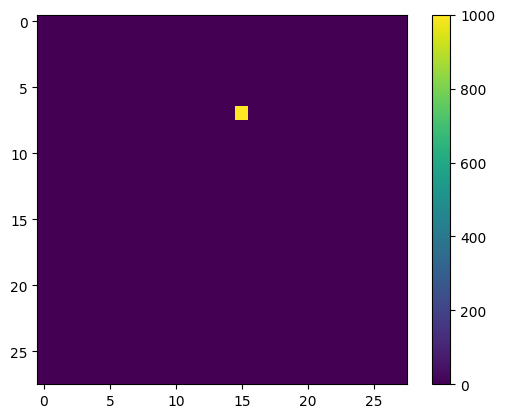

In [74]:
counter = np.zeros(784)

for i in range(iterations):
    gradientVal = gradientDescent(w)
    j = np.argmax(np.abs(gradientVal))
    counter[j] += 1

plt.imshow(counter.reshape(28, 28), interpolation='nearest')
plt.colorbar()
plt.show()



I beleive that this pixel is the only one highlighted because it consistenly shows a high gradient value which in this case indicates that there is a strong difference between 4 and 9. What the high gradient value tells us is that if there is any changes made in this pixels weight it would have a significant impact on $F(W)$.



